In [2]:
# ======================================================================
# There are 5 questions in this exam with increasing difficulty from 1-5.
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score significantly
# less than your Category 5 question.
#
# Don't use lambda layers in your model.
# You do not need them to solve the question.
# Lambda layers are not supported by the grading infrastructure.
#
# You must use the Submit and Test button to submit your model
# at least once in this category before you finally submit your exam,
# otherwise you will score zero for this category.
# ==============================================================================
#
# BASIC DATASETS QUESTION
#
# Create a classifier for the German Traffic Signs dataset that classifies 
# images of traffic signs into 43 classes.
# ==============================================================================
#
# ABOUT THE DATASET
#
# The dataset contains traffic sign boards from the streets captured into
# image files. There are 43 unique classes in total. The images are of shape
# (30,30,3).
# ==============================================================================
#
# INSTRUCTIONS
#
# We have already divided the data for training and validation.
#
# Complete the code in following functions:
# 1. preprocess()
# 2. solution_model()
#
# Your code will fail to be graded if the following criteria are not met:
# 1. The input shape of your model must be (30,30,3), because the testing
#    infrastructure expects inputs according to this specification.
# 2. The last layer of your model must be a Dense layer with 43 neurons
#    activated by softmax since this dataset has 43 classes.
#
# HINT: Your neural network must have a validation accuracy of approximately
# 0.95 or above on the normalized validation dataset for top marks.

import urllib
import zipfile

import tensorflow as tf

# This function downloads and extracts the dataset to the directory that
# contains this file.
# DO NOT CHANGE THIS CODE
# (unless you need to change https to http)
def download_and_extract_data():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
    urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
    with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
        zip_ref.extractall()

# COMPLETE THE CODE IN THIS FUNCTION
def preprocess(image, label):
    # NORMALIZE YOUR IMAGES HERE (HINT: Rescale by 1/.255)
    image = image / 255.0

    return image, label


# This function loads the data, normalizes and resizes the images, splits it into
# train and validation sets, defines the model, compiles it and finally
# trains the model. The trained model is returned from this function.



2024-05-21 18:06:43.043833: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 18:06:43.091650: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 18:06:43.091683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 18:06:43.092812: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 18:06:43.099909: I tensorflow/core/platform/cpu_feature_guar

In [3]:

# COMPLETE THE CODE IN THIS FUNCTION.
# def solution_model():
# Downloads and extracts the dataset to the directory that
# contains this file.
download_and_extract_data()

BATCH_SIZE = 32
IMG_SIZE = 30

# The following code reads the training and validation data from their
# respective directories, resizes them into the specified image size
# and splits them into batches. You must fill in the image_size
# argument for both training and validation data.
# HINT: Image size is a tuple
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='train/',
    label_mode='categorical',
    image_size=  (IMG_SIZE, IMG_SIZE)
    , batch_size = BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='validation/',
    label_mode='categorical',
    image_size=  (IMG_SIZE, IMG_SIZE)
    , batch_size = BATCH_SIZE)

# Normalizes train and validation datasets using the
# preprocess() function.
# Also makes other calls, as evident from the code, to prepare them for
# training.
# Do not batch or resize the images in the dataset here since it's already
# been done previously.

train_ds = train_ds.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(
    tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

Found 31367 files belonging to 43 classes.


2024-05-21 18:07:01.877973: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 18:07:01.925751: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 18:07:01.927808: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 7842 files belonging to 43 classes.


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:

# Code to define the model
model = tf.keras.models.Sequential([
    # ADD LAYERS OF THE MODEL HERE
     # First convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  # Add dropout layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
    

    # If you don't adhere to the instructions in the following comments,
    # tests will fail to grade your model:
    # The input layer of your model must have an input shape of
    # (30,30,3).
    # Make sure your last layer has 43 neurons activated by softmax.
    tf.keras.layers.Dense(43, activation=tf.nn.softmax)
])

In [9]:

# Code to compile and train the model
model.compile(optimizer = 'rmsprop',
            loss = 'categorical_crossentropy',
            metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        9232      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 16)         

In [11]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epochs, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True
# Instantiate the callback class
callbacks = myCallback()

In [12]:
# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30


2024-05-21 18:07:34.527047: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-05-21 18:07:34.703359: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-21 18:07:35.918180: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9c2120bef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-21 18:07:35.918216: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-05-21 18:07:35.923894: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1716314855.996529   25096 device_compiler.h:186] Compiled cluster using XLA!  This li

981/981 [==============================] - 8s 5ms/step - loss: 1.2371 - accuracy: 0.6338 - val_loss: 0.3778 - val_accuracy: 0.8718
Epoch 2/30
981/981 [==============================] - 5s 5ms/step - loss: 0.3099 - accuracy: 0.9023 - val_loss: 0.1418 - val_accuracy: 0.9561
Epoch 3/30
981/981 [==============================] - 5s 5ms/step - loss: 0.1808 - accuracy: 0.9432 - val_loss: 0.1007 - val_accuracy: 0.9709
Epoch 4/30
981/981 [==============================] - 5s 5ms/step - loss: 0.1374 - accuracy: 0.9576 - val_loss: 0.0642 - val_accuracy: 0.9828
Epoch 5/30
981/981 [==============================] - 5s 5ms/step - loss: 0.1149 - accuracy: 0.9650 - val_loss: 0.0766 - val_accuracy: 0.9786
Epoch 6/30
981/981 [==============================] - 5s 5ms/step - loss: 0.1004 - accuracy: 0.9702 - val_loss: 0.0868 - val_accuracy: 0.9774
Epoch 7/30
981/981 [==============================] - 5s 5ms/step - loss: 0.0822 - accuracy: 0.9753 - val_loss: 0.0745 - val_accuracy: 0.9781
Epoch 8/30
981/98

In [14]:
model.save("mymodel.h5")


/opt/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


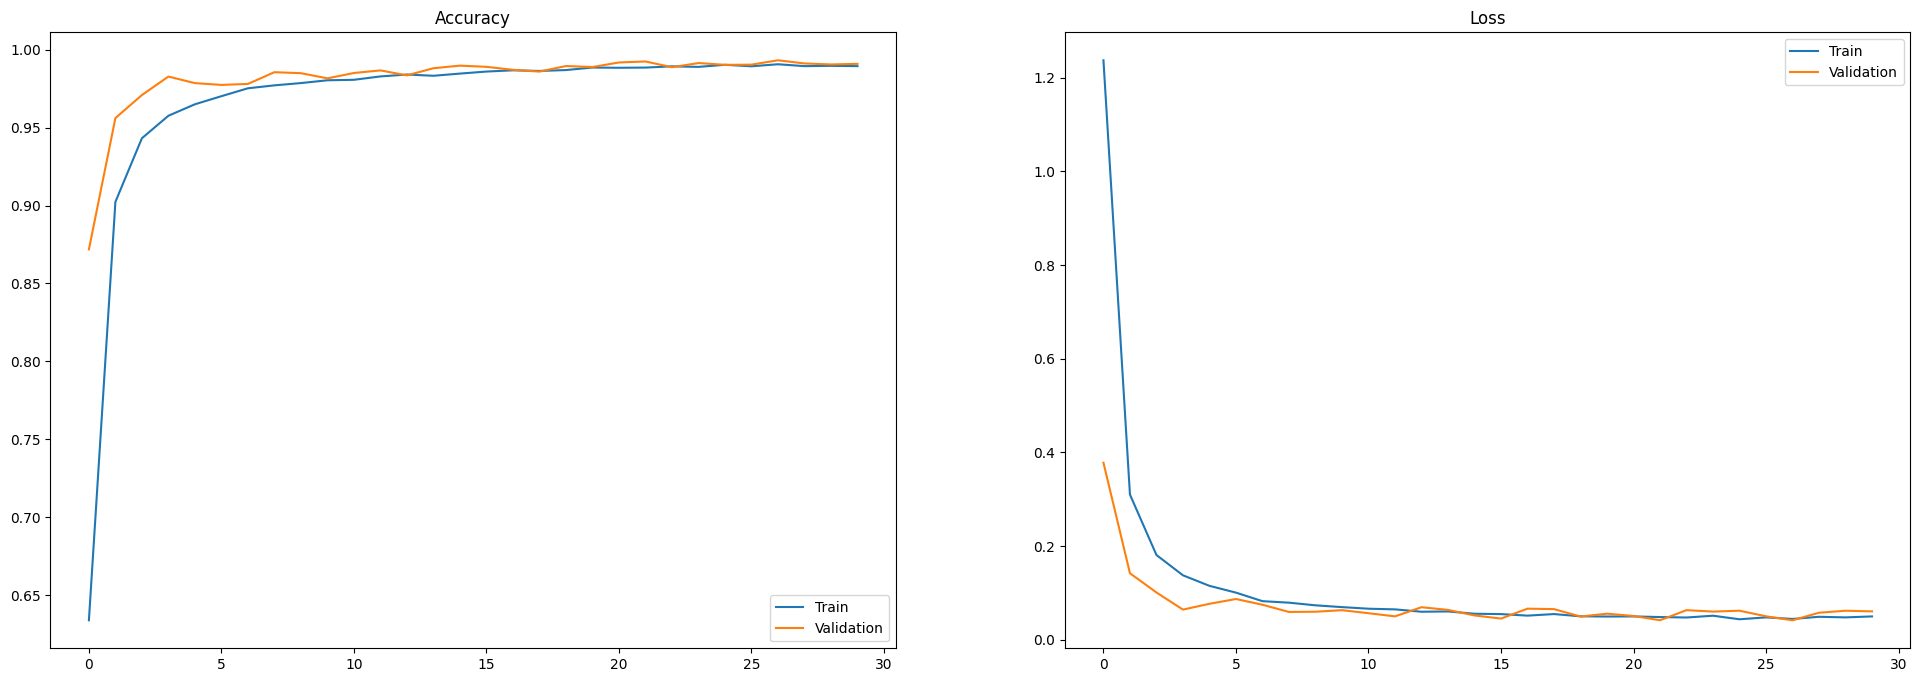

In [13]:
from history import plot_history
plot_history(history)